# **データマイニングと情報可視化: レポート**
# **Data mining and information visualization: Assignment**
<font size="4">
第5回　2024年1月16日(火)<br>
データマイニング手法2-2：クラスター分析（データ解析と可視化）<br>
Method 2-2: Clustering analysis (Analyze data &amp; visualization)<br>
</font>
<span style="color: red;font-weight:bold; font-size:15pt;" >レポート: 締め切り 2024年1月19日(金)　23：59 JST</span>

## (0) 名前と学籍番号を表示してください。/ Please display your name and student ID.

In [1125]:
# print 関数を使って下さい / Use print function.
print("一瀬遥希")
print("1TE22028G")

一瀬遥希
1TE22028G


## (1) 必要なライブラリをインポートしてください。 / Import libraries.

In [1126]:
import numpy as np
from numpy.random import normal,rand

import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import sklearn 
from sklearn.cluster import KMeans

## (2) CSVファイルを読み込む / Load a CSV file
dataフォルダにある、w5_rep_cluster.csv　を読み込んでください。<br>
[Week 2: read csv](Ex_Week2.ipynb#readcsv_index)<br>
[pandasでcsv/tsvファイル読み込み（read_csv, read_table）](https://note.nkmk.me/python-pandas-read-csv-tsv/)<br>
<br>
Please load a data file, w5_rep_cluster.csv, in a folder, named data.<br>
[pandas.read_csv @ Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [1127]:
df=pd.read_csv('data/w5_rep_cluster_nan.csv')

## (3) '.head()'を使って、最初の5行を表示してください。 / Please display the first 5 rows with '.head()'.
データの中身/Contents of the data<br>
3列のデータです。<br>This is a data with three columns.<br>

ID: データのインデックス / indices of data<br>
X: データ1 / Data1<br>
Y: データ2 / Data2<br>
Z: データ3 / Data3<br>

In [1128]:
df.head()

,X,Y,Z
0,-0.262671,-0.107946,NaN
1,-0.133556,0.262957,NaN
2,0.085684,0.041839,NaN
3,-0.212716,-0.121175,NaN
4,-0.137450,0.234851,NaN


## (4) CSVファイルから読み込んだDataFrameの列と行の数を表示してください。
Please show the numbers of rows and columns in the DataFrame named 'df'.

In [1129]:
print(df.shape)

(900, 3)


## (5) NaNがあるかどうか、調べましょう。/ Please check if there is NaN.
単にisnullを使うだけでなく、それぞれの列にいくつNaNがあるか、明示してください。<br>
Please explicitly show how many NaN exist in each column of the DataFrame.

In [1130]:
print(df.isnull().sum())

X      6
Y      8
Z    900
dtype: int64


## (6) 全ての要素がNaNである列を削除してください。/ Delete columns where all elements are NaN.
dropna を使ってください。 / Please use dropna.<br>
[Week4: drop_column](Ex_Week4.ipynb#removenan_subset)

In [1131]:
df2=df.dropna(how='all',axis=1)
df2.head()

,X,Y
0,-0.262671,-0.107946
1,-0.133556,0.262957
2,0.085684,0.041839
3,-0.212716,-0.121175
4,-0.137450,0.234851


## (7) 列Xの欠損値をその列の平均値で置換してください。/ Replace NaN in the columns, X, with the average.
[Week4: Replacement](Ex_Week4.ipynb#replace_ave)

In [1132]:
df2["X"].fillna(df2["X"].mean(),inplace=True)
print(df2.isnull().sum())

X    0
Y    8
dtype: int64


C:\Users\harui\AppData\Local\Temp\ipykernel_21660\2276701311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["X"].fillna(df2["X"].mean(),inplace=True)


In [1133]:
df2.shape

(900, 2)

## (8) 欠損値の削除 / Remove NaN

列Yに一つでも欠損値のある行を削除してください。欠損値の数がゼロになっているのを確認してください。<br>
Remove the rows which have at least one NaN.Please verify that the number of NaN is zero.<br>
[Week 4: Remove NaN](Ex_Week4.ipynb#removenan)

In [1134]:
df2.dropna(subset=['Y'], inplace=True)
print(df2.isnull().sum())

X    0
Y    0
dtype: int64


C:\Users\harui\AppData\Local\Temp\ipykernel_21660\2385896817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['Y'], inplace=True)


In [1135]:
df2.shape

(892, 2)

In [1136]:
df2.head(10)

,X,Y
0,-0.262671,-0.107946
1,-0.133556,0.262957
2,0.085684,0.041839
3,-0.212716,-0.121175
4,-0.137450,0.234851
5,-0.110630,0.109804
6,-0.270666,-0.107088
7,-0.081814,-0.042929
8,-0.000544,0.060960
9,-0.089312,-0.287814


## (9) データを散布図でプロットしてみましょう / Please plot data points with a scattering plot.
Pandasのプロットメソッドを用いてください。<br>
読み込んだDataFrameの1列目と2列目を散布図でプロットしてください。<br>
ぼんやりグループになっていそうなのが見えますか??
<br>
<br>
Please plot the first and the second columns of the DataFrame you loaded above.<br>
Can you see there are some groups vaguely??<br>

[Week5: Pandas Plot Method](Ex_Week5.ipynb#PanadasPlot)

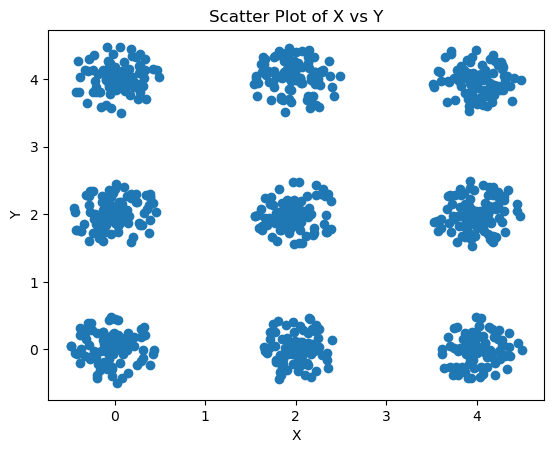

In [1137]:
x = df["X"] # 1列目
y = df["Y"]  # 2列目

# 散布図を描画
plt.scatter(x, y)
plt.xlabel('X')  # x軸のラベル
plt.ylabel('Y')  # y軸のラベル
plt.title('Scatter Plot of X vs Y')  # グラフのタイトル
plt.show()

## (10) k-means法で解析 / Analyze data with k-means method.
k-means法を使って、9つのクラスターに分類してください。<br>
Please carry out clustering analysis with k-means method. The number of clusters is 9.<br>

[Week5: K-means Method](Ex_Week5.ipynb#kmeans)

In [1138]:
df2.head(10)

,X,Y
0,-0.262671,-0.107946
1,-0.133556,0.262957
2,0.085684,0.041839
3,-0.212716,-0.121175
4,-0.137450,0.234851
5,-0.110630,0.109804
6,-0.270666,-0.107088
7,-0.081814,-0.042929
8,-0.000544,0.060960
9,-0.089312,-0.287814


In [1139]:
X = df2.values[:, 0:2]

# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=9)

# モデルの適用とクラスタ番号の予測
kmeans.fit(X)
y_pred = kmeans.predict(X)


c:\Users\harui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\harui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


## (11)  concatでデータを横に結合(axis=1を指定) / Combine the columns of data laterally.

欠損値を削除したあとのDataFrame(仮に「df」とします)は、欠損値のあった行が削除されているので、indexの番号がとびとびになっています。<br>
6行目が削除されているので、「.head(10)」で確認してみてください。<br>
この時、dfとy_predをconcatで結合すると、インデックスが合わないので、欠損値を含む300行のDataFrameになってしまいます。<br>
これを避けるためには、y_predをDataFrameに変換して、y_predのインデックスをdfと一致するように、以下のように与えます。<br>
y_pred=pd.DataFrame(y_pred,index=df2.index)<br>
そのあと、dfとy_predをconcatで結合すると、288行のDataFrameで、1列目が「Data1」、2列目が「Data2」、3列目が「y_pred」になります。<br>
<br>
After deleting NaN, the DataFrame (let's call it "df") will have the unconsecutive index numbers because the row with NaN has been deleted. <br>
The sixth line has been deleted, so check it out in ".head(10)". <br>
If we concatenate df and y_pred with concat, the indexes do not match, so we end up with a 300-line DataFrame with NaN. <br>
To avoid this, convert y_pred to a DataFrame and give the index of y_pred to match that of df, as follows <br>
y_pred=pd.DataFrame(y_pred,index=df2.index)<br>
After that, concatenate df and y_pred with concat to get a 288-line DataFrame with "Data1" in the first column, "Data2" in the second column, and "y_pred" in the third column. <br>
<br>
データフレームをコピーするとき、警告が出ることがありますが、処理はできていると思います。「head()」で確認してみてください。<br>
When you copy a DataFrame, you may have a warning, but the process will be done. Please check it with 'head()'.<br>

In [1140]:
y_pred=pd.DataFrame(y_pred,index=df2.index)
# concatでデータを横に結合(axis=1を指定) / Combine the columns of data laterally.
# 元のDataFrameの1行目、2行目のデータと、予測したクラスタ番号の列を結合して、新しいDataFrameを作ります。
# Merge the the first and the second columns with the predicted cluster numbers into a DataFrame.
merge_data = pd.concat([pd.DataFrame(df2["X"]), pd.DataFrame(df2["Y"]), pd.DataFrame(y_pred)], axis=1)

# # 3列目を'cluster', と列名をつけてください。'head.()'で確認してください。
# Please give a name, 'cluster', to the first column. Make sure if it was done correctly with '.head()'.
merge_data.columns = ['X','Y','cluster']



In [1141]:
merge_data.shape

(892, 3)

In [1142]:
print(merge_data.isnull().sum())

X          0
Y          0
cluster    0
dtype: int64


## (12) 各クラスターにいくつずつデータが分類されているか、確認してください。
## Please check how many data points belong to each cluster.
[Week3: Value_count](Ex_Week3.ipynb#value_count)

In [1143]:
# 各クラスタに含まれるデータポイントの数を確認
cluster_counts = merge_data['cluster'].value_counts()

# 結果を表示
print(cluster_counts)


cluster
2    101
8    101
7    101
5    100
3     99
1     98
4     98
0     97
6     97
Name: count, dtype: int64


## (13) クラスタごとに色分けして、プロットしてください。
## Plot data with a scattering plot with different colors by cluster.

(4)でプロットした散布図と同じ図が、プロットされているのを確認してください。<br>
(8)でクラスタリングした結果に従って、点の色が6色に分かれてプロットされていますか??<br>
<br>
Please make sure that you obtained the same figure you made in (4).<br>
The only difference is the color of the dots.<br>
The color of the dots must have been chosen depending on the result of the clustering you did in (8).

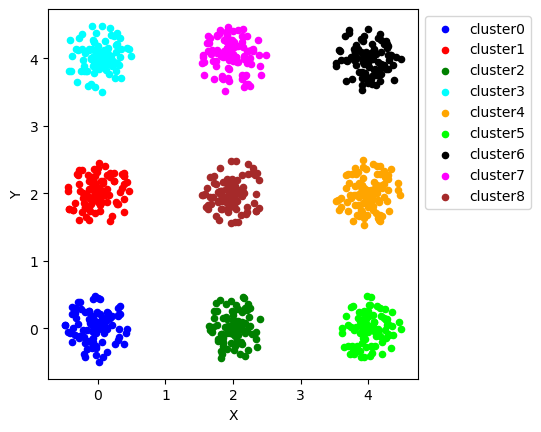

In [1144]:
import matplotlib.pyplot as plt

# データフレームの列名が 'X' と 'Y' であるため、これを使用します
ax = None

# クラスター数が9なので9色を用意
colors = ['blue', 'red', 'green', 'cyan', 'orange', 'lime', 'black', 'magenta', 'brown']

# グループ化して散布図にプロット
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='X', y='Y', color=colors[i],
                           label=f'cluster{i}', ax=ax)

# 凡例の位置を調整
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# アスペクト比を調整
ax.set_aspect('equal', adjustable='box')

# 画像を保存
plt.savefig("w5_kmeanspp.png", format="png", dpi=300)


## おまけ (1)：k-means++を使って解析してみよう。
## Optional 1: Let's analyze data with k-means++ method!!
詳細はともかく、オプションを変えるだけですから、とりあえず試してみて、k-means法と結果を比較してみましょう。<br>
By simply changing the option, you can use k-means++ method. Let's try it first, then compare the result with the one by k-means method.<br>
You can look into the detail of the method later...<br>
<img src="img/w5-kmeanspp.png" width="600px"><br>

In [1145]:
# まずデータを用意 / Prepare an original DataFrame.
df_kpp = df2

In [1146]:
df_kpp.shape

(892, 2)

In [1147]:
# KMeansクラスの初期化 / Initialize KMeans class
kmeans = KMeans(n_clusters=9, init='k-means++', n_init=5, max_iter=300, tol=1e-04, random_state=0)


# K-means クラスタリングをおこなう / Clustering with k-means method.
X2 = df_kpp.values[:, 0:2]
kmeans.fit(X2)

# クラスター番号を予測 / Predict the cluster number.
y_pred2 = kmeans.predict(X2)

# suits_kpp にクラスター番号のデータを追加。index は、cluster_kpp.　Add a columns to the DataFrame, suits_kpp.
df_kpp['cluster_kpp'] = y_pred2


c:\Users\harui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\harui\AppData\Local\Temp\ipykernel_21660\4039250431.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kpp['cluster_kpp'] = y_pred2


## クラスタごとに色分けして、プロットしてください。
## Plot data with a scattering plot with different colors by cluster.

subplotを使って、k-means法とk-means++法の結果を並べてみるとなおよいでしょう。<br>
It would be nice if you can compare the results with k-means and k-means++ by using subplot.<br>


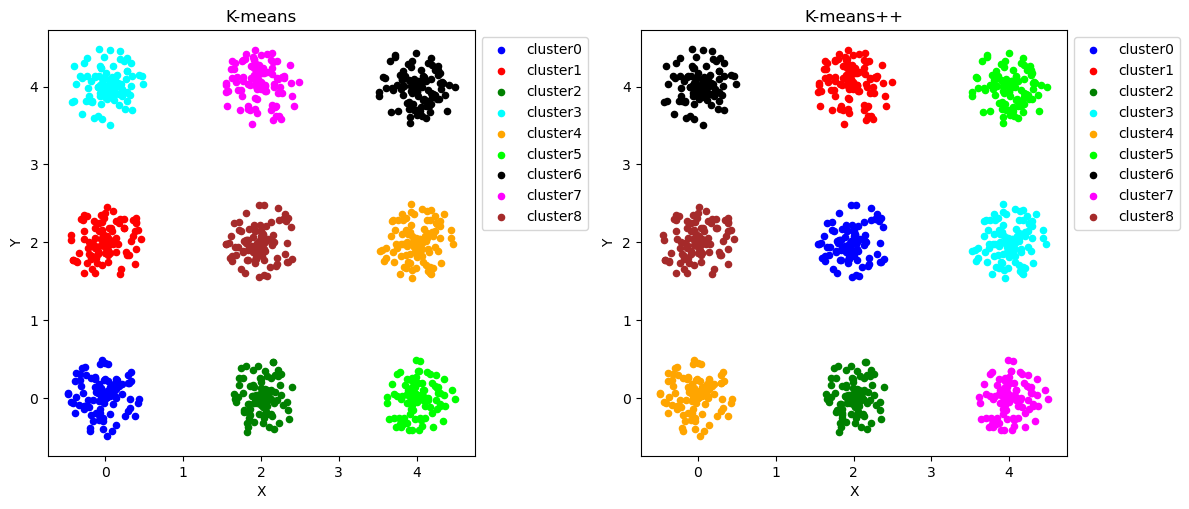

In [1148]:
import matplotlib.pyplot as plt

# クラスター数が9なので9色を用意
colors = ['blue', 'red', 'green', 'cyan', 'orange', 'lime', 'black', 'magenta', 'brown']

# subplotを作成
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# K-meansの結果をプロット
for i, data in merge_data.groupby('cluster'):
    data.plot.scatter(x='X', y='Y', color=colors[i], label=f'cluster{i}', ax=ax1)

# K-means++の結果をプロット
for i, data in df_kpp.groupby('cluster_kpp'):
    data.plot.scatter(x='X', y='Y', color=colors[i], label=f'cluster{i}', ax=ax2)

# 凡例の位置を調整
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

# アスペクト比を調整
ax1.set_aspect('equal', adjustable='box')
ax2.set_aspect('equal', adjustable='box')

# タイトルを追加
ax1.set_title('K-means')
ax2.set_title('K-means++')

# 画像を保存
plt.tight_layout()
plt.savefig("kmeans_vs_kmeanspp.png", format="png", dpi=300)


## k-means法の解析結果と比較してみよう / Compare the results by k-means and k-means++ methods

In [1149]:
# どちらのほうがうまくクラスタリングできていましたか??
# Please compare the bar graphs analyzed with the two methods, and discuss the difference.

# 分かれ方はほぼ同じ結果でしたが、クラスタリングする位置が異なっていました。

## おまけ (2)：最適なクラスター数を決める手法の一つである、エルボー法を用いて、上のデータの最適なクラスター数を検討してください。
## Optional 2: Please evaluate the optimal cluster number of the data used above with Elbow method.

c:\Users\harui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\harui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\harui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\harui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

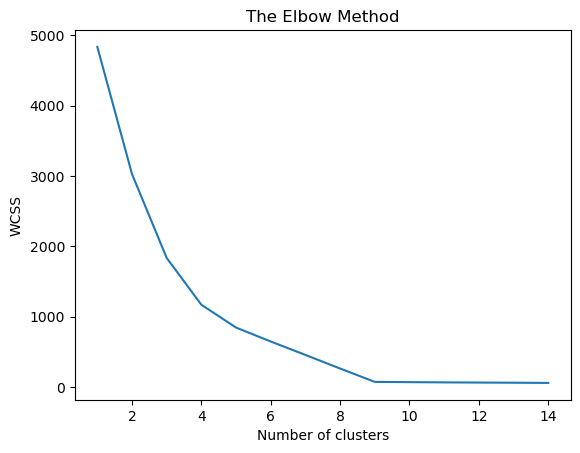

In [1150]:
wcss = []

# 試行するクラスタ数の範囲（例えば1から10まで）
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# エルボー法のグラフをプロット
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()